In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프를 위한 기본 설정
# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
# 그래프의 크기
plt.rcParams['figure.figsize'] = 12, 6
# 글자 크기
plt.rcParams['font.size'] = 14
# 폰트 설정시 마이너스 기호가 깨지는 것을 방지한다.
plt.rcParams['axes.unicode_minus'] = False

### 한국 복지 패널 데이터
- 한국 복지 패널은 빈곤층, 근로빈곤층, 차상중하위 계층 등 다양한 계층의 규모 및 생활 실태 변화를 추적하여 파악함으로써, 정책 형성에 기여를 하고 있다. 
- 한국 복지 패널 사이트의 소개 내용입니다.

### 데이터를 읽어온다

In [3]:
df = pd.read_spss('data/health_2021/Koweps_hpc16_2021_beta1.sav')
df

,h16_id,h16_ind,h16_sn,h16_merkey,h_new,h16_cobf,p16_wgl,p16_wsl,p16_wsc,p16_wgc,...,c1607_4aq19,c1607_4aq20,c1607_4aq21,c1607_4aq22,c1607_4aq23,h16_pers_income1,h16_pers_income2,h16_pers_income3,h16_pers_income4,h16_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,1268.732029,0.258472,0.258472,1268.732029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,1692.852668,0.344876,0.344876,1692.852668,...,NaN,NaN,NaN,NaN,NaN,NaN,1980.0,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,1147.135194,0.233700,0.233277,1145.058871,...,NaN,NaN,NaN,NaN,NaN,NaN,621.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,2648.283427,0.539522,0.535139,2626.772554,...,NaN,NaN,NaN,NaN,NaN,4392.0,NaN,NaN,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,4602.998190,0.937746,0.937746,4602.998190,...,NaN,NaN,NaN,NaN,NaN,NaN,1330.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13139,9794.0,7.0,1.0,97940701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,108.0,NaN,0.0,NaN
13140,9795.0,7.0,1.0,97950701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
13141,9796.0,7.0,1.0,97960701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
13142,9796.0,7.0,1.0,97960701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,500.0


- h16_g3 : 성별. 남자(1), 여자(2), 모름/무응답(9)
- h16_g4 : 태어난 년도. 모름/무응답(9999)
- h16_g10 : 혼인상태. 해당없음(만18세 미만)(0), 유배우(1), 사별(2), 이혼(3), 별거(4), 미혼(5, 18세 이상, 미혼모 포함), 기타(6, 사망 등), 모름/무응답(9)
- h16_g11 : 종교유무. 있음(1), 없음(2), 모름/무응답(9)
- p1602_8aq1 : 일을 한 달의 월 평균 임금
- h16_reg7 : 7개 권역별 지역 구분. 서울(1), 수도권(2, 인천/경기), 부산/울산/경남(3), 대구/경북(4), 대전/충남(5), 강원/충북(6), 광주/전남/전북/제주도(7)

In [74]:
df['h16_g10'].value_counts()

1.0    6547
5.0    2246
2.0    1849
0.0    1736
3.0     687
4.0      63
6.0      16
Name: h16_g10, dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13144 entries, 0 to 13143
Columns: 1044 entries, h16_id to h16_pers_income5
dtypes: float64(1041), object(3)
memory usage: 104.7+ MB


### 사용하고자 하는 컬럼만 가져온다

In [76]:
a1 = ['h16_g3', 'h16_g4', 'h16_g10', 'h16_g11', 'p1602_8aq1', 'h16_reg7']
a2 = ['성별', '출생년도', '혼인상태', '종교유무', '월평균임금', '지역']

df1 = df[a1]
df1.columns = a2
df1

,성별,출생년도,혼인상태,종교유무,월평균임금,지역
0,2.0,1945.0,2.0,2.0,NaN,1.0
1,1.0,1948.0,2.0,2.0,165.0,1.0
2,1.0,1942.0,3.0,1.0,NaN,1.0
3,1.0,1962.0,1.0,1.0,366.0,1.0
4,2.0,1963.0,1.0,1.0,190.0,1.0
...,...,...,...,...,...,...
13139,2.0,1947.0,2.0,2.0,NaN,6.0
13140,2.0,1947.0,2.0,2.0,NaN,6.0
13141,1.0,1933.0,1.0,2.0,NaN,6.0
13142,2.0,1936.0,1.0,2.0,NaN,6.0


In [77]:
map1 = {
    1:'남자',
    2:'여자',
    9:'모름/무응답'
}

map2 = {
    0:'해당없음',
    1: '유배우',
    2: '사별',
    3: '이혼',
    4: '별거',
    5: '미혼',
    6: '기타',
    9:'모름/무응답'
}

map3 = {
    1:'있음',
    2:'없음',
    9:'모름/무응답'
}

map4 = {
    1:'서울',
    2:'인천/경기',
    3:'부산/울산/경남',
    4:'대구/경북',
    5:'대전/충남',
    6:'강원/충북',
    7:'광주/전남/전북/제주'
}

df1['성별'] = df1['성별'].map(map1)
df1['혼인상태'] = df1['혼인상태'].map(map2)
df1['종교유무'] = df1['종교유무'].map(map3)
df1['지역']=df1['지역'].map(map4)
df1

/var/folders/2p/5ztvmmzx1xzdnqqn7snr0gp00000gn/T/ipykernel_58325/1294419227.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['성별'] = df1['성별'].map(map1)
/var/folders/2p/5ztvmmzx1xzdnqqn7snr0gp00000gn/T/ipykernel_58325/1294419227.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['혼인상태'] = df1['혼인상태'].map(map2)
/var/folders/2p/5ztvmmzx1xzdnqqn7snr0gp00000gn/T/ipykernel_58325/1294419227.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

,성별,출생년도,혼인상태,종교유무,월평균임금,지역
0,여자,1945.0,사별,없음,NaN,서울
1,남자,1948.0,사별,없음,165.0,서울
2,남자,1942.0,이혼,있음,NaN,서울
3,남자,1962.0,유배우,있음,366.0,서울
4,여자,1963.0,유배우,있음,190.0,서울
...,...,...,...,...,...,...
13139,여자,1947.0,사별,없음,NaN,강원/충북
13140,여자,1947.0,사별,없음,NaN,강원/충북
13141,남자,1933.0,유배우,없음,NaN,강원/충북
13142,여자,1936.0,유배우,없음,NaN,강원/충북


### 정보확인

In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13144 entries, 0 to 13143
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      13144 non-null  object 
 1   출생년도    13144 non-null  float64
 2   혼인상태    13144 non-null  object 
 3   종교유무    13144 non-null  object 
 4   월평균임금   4313 non-null   float64
 5   지역      13144 non-null  object 
dtypes: float64(2), object(4)
memory usage: 616.2+ KB


In [79]:
df1.fillna(0, inplace=True)

# 결측치 확인
df1.isna().sum()

/Users/kwonsoonhyun/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


성별       0
출생년도     0
혼인상태     0
종교유무     0
월평균임금    0
지역       0
dtype: int64

In [80]:
# 각 컬럼별 값 확인
display(df1['성별'].value_counts())
display(df1['출생년도'].agg(['min', 'max']))
display(df1['혼인상태'].value_counts())
display(df1['종교유무'].value_counts())
display(df1['월평균임금'].agg(['min', 'max']))
display(df1['지역'].value_counts())

여자    7219
남자    5925
Name: 성별, dtype: int64

min    1907.0
max    2020.0
Name: 출생년도, dtype: float64

유배우     6547
미혼      2246
사별      1849
해당없음    1736
이혼       687
별거        63
기타        16
Name: 혼인상태, dtype: int64

없음    7476
있음    5668
Name: 종교유무, dtype: int64

min       0.0
max    1752.0
Name: 월평균임금, dtype: float64

인천/경기          3018
광주/전남/전북/제주    2291
부산/울산/경남       2233
서울             1773
대구/경북          1555
대전/충남          1244
강원/충북          1030
Name: 지역, dtype: int64

### 조사대상에 대한 성별과 지역 분포를 확인한다

/Users/kwonsoonhyun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kwonsoonhyun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kwonsoonhyun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kwonsoonhyun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kwonsoonhyun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kwonsoonhyun/opt/anacon

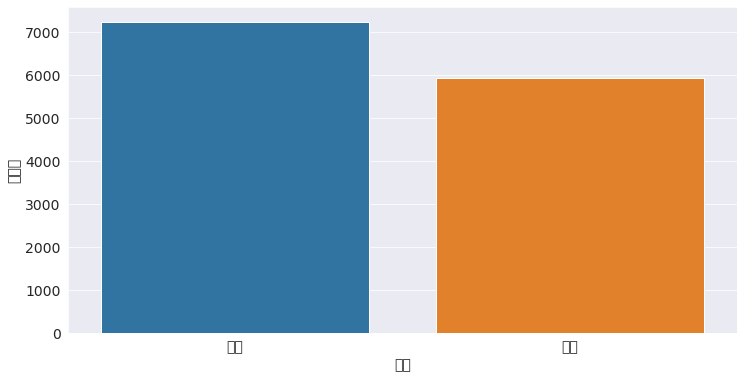

In [81]:
sns.countplot(data=df1, x= '성별')
plt.ylabel('사람수')
plt.show()

/Users/kwonsoonhyun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kwonsoonhyun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 52380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kwonsoonhyun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kwonsoonhyun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kwonsoonhyun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kwonsoonhyun/opt/anacon

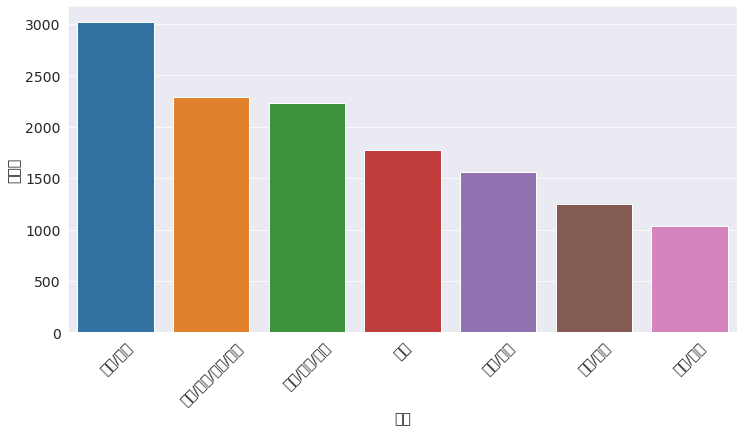

In [82]:
# 각 지역별로 사람의 수를 구한다.
a1 = df1[['지역', '성별']]
a2 = a1.groupby('지역', as_index=False).count()
a2.columns = ['지역', '사람수']
a2.sort_values('사람수', ascending=False, inplace=True)

sns.barplot(data=a2, x='지역', y='사람수')
plt.xticks(rotation=45)
plt.show()

### 나이에 따른 월급 변화

In [83]:
# 나이를 계산해서 추가한다.
df1['나이'] = 2021-df1['출생년도'] + 1
df1

/var/folders/2p/5ztvmmzx1xzdnqqn7snr0gp00000gn/T/ipykernel_58325/475846637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['나이'] = 2021-df1['출생년도'] + 1


,성별,출생년도,혼인상태,종교유무,월평균임금,지역,나이
0,여자,1945.0,사별,없음,0.0,서울,77.0
1,남자,1948.0,사별,없음,165.0,서울,74.0
2,남자,1942.0,이혼,있음,0.0,서울,80.0
3,남자,1962.0,유배우,있음,366.0,서울,60.0
4,여자,1963.0,유배우,있음,190.0,서울,59.0
...,...,...,...,...,...,...,...
13139,여자,1947.0,사별,없음,0.0,강원/충북,75.0
13140,여자,1947.0,사별,없음,0.0,강원/충북,75.0
13141,남자,1933.0,유배우,없음,0.0,강원/충북,89.0
13142,여자,1936.0,유배우,없음,0.0,강원/충북,86.0


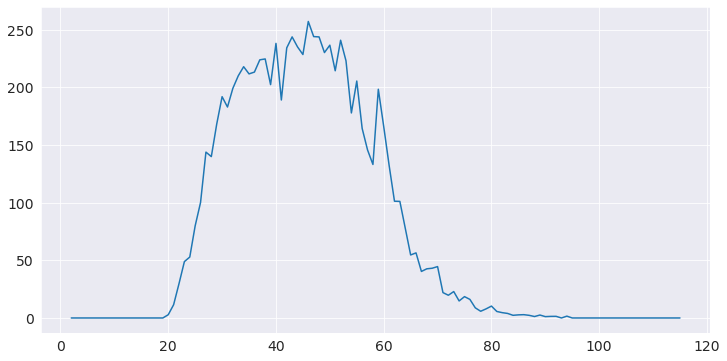

In [84]:
# 각 나이별 급여 평균을 구한다.
a1 = df1[['나이', '월평균임금']]
a2 = a1.groupby('나이', as_index=False).mean()
a2.fillna(0, inplace=True)
# 나이를 기준으로 오름차순 정렬을 한다. 
a2.sort_values('나이', inplace=True)

# 선그래프롤 그린다. 
plt.plot(a2['나이'], a2['월평균임금'])
plt.show()

/Users/kwonsoonhyun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kwonsoonhyun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kwonsoonhyun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kwonsoonhyun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kwonsoonhyun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kwonsoonhyun/opt/anacon

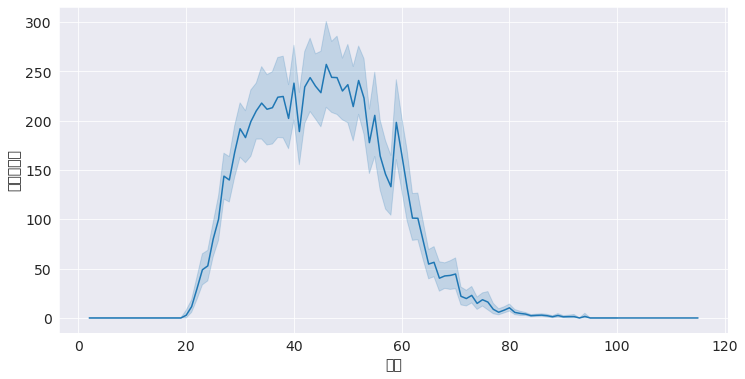

In [85]:
sns.lineplot(data=df1, x='나이', y='월평균임금')
plt.show()

In [86]:
# 연령대별 평균 금여액을 살펴본다.
df1['연령대'] = df1['나이'] // 10 * 10
df1

/var/folders/2p/5ztvmmzx1xzdnqqn7snr0gp00000gn/T/ipykernel_58325/3134202255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['연령대'] = df1['나이'] // 10 * 10


,성별,출생년도,혼인상태,종교유무,월평균임금,지역,나이,연령대
0,여자,1945.0,사별,없음,0.0,서울,77.0,70.0
1,남자,1948.0,사별,없음,165.0,서울,74.0,70.0
2,남자,1942.0,이혼,있음,0.0,서울,80.0,80.0
3,남자,1962.0,유배우,있음,366.0,서울,60.0,60.0
4,여자,1963.0,유배우,있음,190.0,서울,59.0,50.0
...,...,...,...,...,...,...,...,...
13139,여자,1947.0,사별,없음,0.0,강원/충북,75.0,70.0
13140,여자,1947.0,사별,없음,0.0,강원/충북,75.0,70.0
13141,남자,1933.0,유배우,없음,0.0,강원/충북,89.0,80.0
13142,여자,1936.0,유배우,없음,0.0,강원/충북,86.0,80.0


/Users/kwonsoonhyun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kwonsoonhyun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kwonsoonhyun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kwonsoonhyun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kwonsoonhyun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kwonsoonhyun/opt/anacon

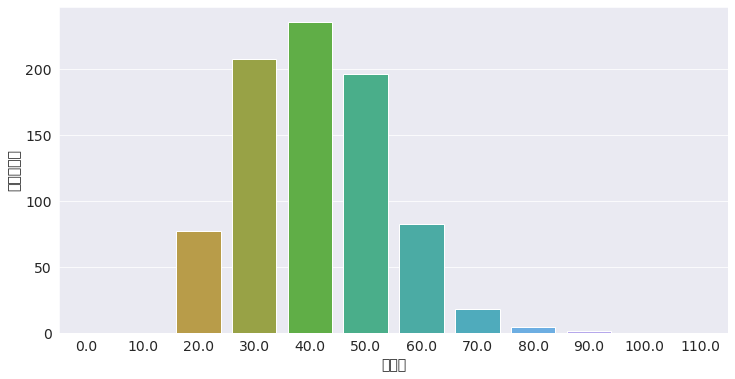

In [87]:
# 연령대별 급여 평균을 구한다.
a1 = df1[['연령대', '월평균임금']]
a2= a1.groupby('연령대', as_index=False).mean()
a2.sort_values('연령대', inplace=True)

sns.barplot(data=a2, x='연령대', y='월평균임금')
plt.show()

### 종교 유무에 따른 이혼율을 구하시오

In [88]:
# 결혼을 한적이 있는 사람들의 데이터만 가져온다.
df1['혼인상태'].value_counts()

유배우     6547
미혼      2246
사별      1849
해당없음    1736
이혼       687
별거        63
기타        16
Name: 혼인상태, dtype: int64

In [89]:
# 결혼을 한적이 있는 사람들의 데이터만 가져온다.
a1 = ['미혼', '해당없음']

df2 = df1.query('혼인상태 not in @a1')
df2['혼인상태'].value_counts()

유배우    6547
사별     1849
이혼      687
별거       63
기타       16
Name: 혼인상태, dtype: int64

In [90]:
# 이혼이 아닌 데이터는 이혼아님으로 변경한다.
idx = df2.query('혼인상태 != "이혼"').index
df2.loc[idx, '혼인상태'] = '이혼아님'
df2['혼인상태'].value_counts()

/Users/kwonsoonhyun/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


이혼아님    8475
이혼       687
Name: 혼인상태, dtype: int64

/Users/kwonsoonhyun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kwonsoonhyun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54844 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kwonsoonhyun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kwonsoonhyun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kwonsoonhyun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kwonsoonhyun/opt/anacon

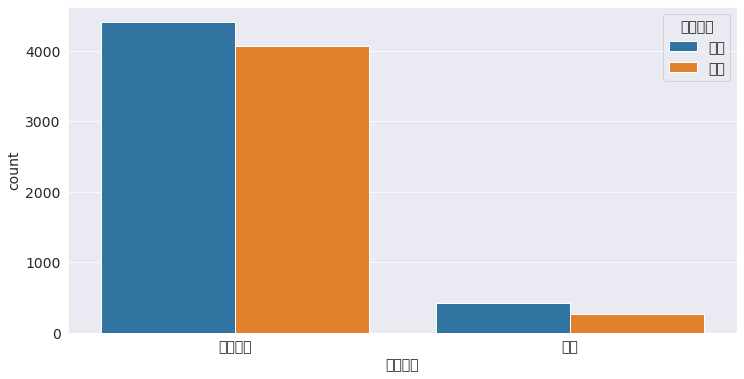

In [91]:
# 종교에 따른 혼인 유무의 양을 비교한다.
sns.countplot(data=df2, x='혼인상태', hue='종교유무')
plt.show()

In [92]:
# 혼인상태와 종교유무만 가져온다.
a1 = df2[['혼인상태', '종교유무', '성별']]

# 종교유무로 그룹을 묶고 그 안에서 혼인상태를 기준으로 그룹을 나누어 수룰 계산.
a2 = a1.groupby(['종교유무', '혼인상태']).count()
a2.columns = ['사람수']
a2

사람수
종교유무 혼인상태      
없음   이혼     417
     이혼아님  4403
있음   이혼     270
     이혼아님  4072

In [93]:
# 종교가 없고 이혼한 사람의 수
b1 = a2.loc['없음'].loc['이혼'].loc['사람수']
# 종교가 없고 이혼하지 않은 사람의 수
b2 = a2.loc['없음'].loc['이혼아님'].loc['사람수']
# 종교가 있고 이혼한 사람의 수
b3 = a2.loc['있음'].loc['이혼'].loc['사람수']
# 종교가 있고 이혼하지 않은 사람의 수
b4 = a2.loc['있음'].loc['이혼아님'].loc['사람수']

/Users/kwonsoonhyun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kwonsoonhyun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54844 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kwonsoonhyun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kwonsoonhyun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kwonsoonhyun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kwonsoonhyun/opt/anacon

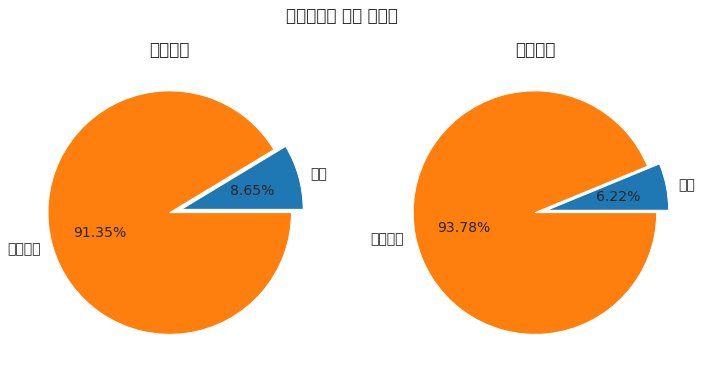

In [94]:
# 라벨
labels = ['이혼', '이혼아님']
# 조각이 튀어나오는 정도
explode = [0.1, 0]

plt.subplot(1, 2, 1)
plt.pie([b1, b2], labels=labels, explode=explode, autopct='%.2f%%')
plt.title("종교없음")

plt.subplot(1, 2, 2)
plt.pie([b3, b4], labels=labels, explode=explode, autopct='%.2f%%')
plt.title("종교있음")


plt.suptitle('종교유무에 따른 이혼율')
plt.show()